# La teoría de la información
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## La información
La información es una propiedad concreta de la materia y la energía que es cuantificable y mensurable.

### Agenda
1. Incertidumbre
1. Información
1. Entropía
1. Codificación de la fuente

In [1]:
# Importar módulos al cuaderno
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as st

# Definir e incluir nuevas funciones al cuaderno


## 1. Incertidumbre:
---
Falta de confianza o certeza sobre un evento, en el caso de un alfabeto de entrada $X = \{x_1, x_2,...,x_i,...,x_n\}$ de $n$ símbolos con probabilidades de ocurrencia $P = \{p_1,...,p_n\}$ antes del primer símbolo y probabilidades de ocurrencia $\tilde P = \{ \tilde p_1,..., \tilde p_n\}$ antes del segundo símbolo; la incertidumbre es proporcional a la sumatoria de la probabilidad de ocurrencia de todos los símbolos posibles; esto es: 

\begin{align*}
S =
\begin{cases}
S_{0}=-\sum _{i=1}^{n}p_{i}\log _{2}p_{i} \quad (\text{Incertidumbre inicial}) \\
S_{f}=-\sum _{i=1}^{n}{\tilde {p}}_{i}\log _{2}{\tilde {p}}_{i} \quad (\text{Incertidumbre final})\\
\end{cases}
\end{align*}

>Nota:
> * Si la base del logaritmo es $b=2$, la unidad de información es __bits__;
> * Si la base es $b=e$, entonces la unidad es __nats__; 
> * Y finalmente si $b=10$, la unidad es __hartleys__.

### <code>Ejemplo:</code> Alfabeto español
Si se desea transmitir un mensaje binario escrito originalmente usando las mayúsculas del alfabeto latino y según la [frecuencia de aparición](https://es.wikipedia.org/wiki/Frecuencia_de_aparici%C3%B3n_de_letras) de letras en el español:

* ¿Cuál es el número de símbolos del alfabeto latino?
* ¿Cuál es el tamaño mínimo de bits para transmitir un símbolo?
* ¿Cuál es la suma de todas las probabilidades de símbolo?
* ¿Cuál es la probabilidad de una vocal?

In [2]:
# Matriz de probabilidades
probabilidades = {
    "A": 0.1253, "B": 0.0142, "C": 0.0468, "D": 0.0586, "E": 0.1368, "F": 0.0069,
    "G": 0.0101, "H": 0.0070, "I": 0.0625, "J": 0.0044, "K": 0.0001, "L": 0.0497,
    "M": 0.0315, "N": 0.0671, "Ñ": 0.0031, "O": 0.0868, "P": 0.0251, "Q": 0.0088,
    "R": 0.0687, "S": 0.0798, "T": 0.0463, "U": 0.0393, "V": 0.0090, "W": 0.0001,
    "X": 0.0022, "Y": 0.0090, "Z": 0.0052
}

# Probabilidades de ocurrencia por letra
probabilidad_letras = probabilidades.values()

# Probabilidades de ocurrencia de las vocales
probabilidad_vocales = [
    probabilidades["A"],
    probabilidades["E"],
    probabilidades["I"],
    probabilidades["O"],
    probabilidades["U"]
]

# Número de símbolos en el alfabeto
letras = len(probabilidad_letras)
# Tamaño mínimo de palabra (binario)
tamaño = round(m.log2(letras))
# Sumatoria de probabilidades
suma_letras = round(sum(probabilidad_letras), 2)
# Sumatoria de probabilidades para una vocal
suma_vocales = round(sum(probabilidad_vocales), 2)

# Salida
print("Número de símbolos posibles: ", letras)
print("Tamaño de palabra: ", tamaño, "bits")
print("Suma de probabilidades letras: ", suma_letras)
print("Suma de probabilidades vocales: ", suma_vocales)


Número de símbolos posibles:  27
Tamaño de palabra:  5 bits
Suma de probabilidades letras:  1.0
Suma de probabilidades vocales:  0.45



### <code>Ejemplo:</code> Alfabeto español
Continuando con el ejemplo anterior:

* ¿Cuál es la incertidumbre de un símbolo para una palabra nueva?
* ¿Cuál es la incertidumbre de el segundo símbolo si el primero en llegar es una "Z"?
* ¿Cuál es el cambio en la incertidumbre de símbolo?

In [3]:
# Probabilidades primera letra
P1 = probabilidad_letras
P2 = list(np.multiply(np.array(probabilidad_vocales), 1/suma_vocales))

s0, s1 = 0, 0
for item in P1:
    s0 -= item * m.log2(item)

for item in P2:
    s1 -= item * m.log2(item)

# Cambio en la incertidumbre
Δs = - (s1 - s0)

# Salida
print(f"|", "-"*38, "|")
print(f"| Pos | letra | Inicial | Final | Cambio |")
print(f"|", "-"*38, "|")
print(f"|  1  |   Z   | {s0:7.2f} | {s1:5.2f} | {Δs:6.2f} |")
print(f"|", "-"*38, "|")


| -------------------------------------- |
| Pos | letra | Inicial | Final | Cambio |
| -------------------------------------- |
|  1  |   Z   |    4.04 |  2.20 |   1.84 |
| -------------------------------------- |


## 2. Información
---
### 2.1. Definición:
Es un conjunto de datos (mensaje) sobre un determinado fenómeno que no se conocían.

Se basa en:
* La información es transferida desde una fuente a un destinatario, solo si este ultimo no la conocía previamente.
* La información siempre es mayor o igual a cero
* No existe información en un símbolo seguro (probabilidad)
* Existe información infinita en un símbolo imposible (probabilidad)

### 2.2. Ecuaciones:

\begin{align*}
I(s) &= - (S_f - S_o) \quad \text{Reducción de la incertidumbre} \\
I(x_i) &= log_b \frac {1}{p(x_i)} = - log_b p(x_i) \quad \text{Autoinformación} \\
\end{align*}

>Nota:
> * Si la base del logaritmo es $b=2$, la unidad de información es __bits__;
> * Si la base es $b=e$, entonces la unidad es __nats__; 
> * Y finalmente si $b=10$, la unidad es __hartleys__.


### <code>Ejemplo:</code> Alfabeto español
Continuando con la distribución de probabilidades del ejemplo anterior:
* ¿Cuál es la información asociada a la primera letra "Z" en un codificador optimo?
* ¿Cuál es la información asociada a la llegada de la primera letra "Z"?

In [4]:
auto_info_z = m.log2(1/probabilidades["Z"])

# Salida
print(
    f"La información asociada a la letra Z en un codificador optimo es:    {auto_info_z:6.2f} bits.")
print(
    f"La información asociada a la letra Z por reducción de incertidumbre: {Δs:6.2f} bits.")


La información asociada a la letra Z en un codificador optimo es:      7.59 bits.
La información asociada a la letra Z por reducción de incertidumbre:   1.84 bits.



## 3. Entropía
---
### 3.1. Definición:
En teoría de la información la entropía es una medida de la incertidumbre de una fuente de información.

Se basa en:
* La entropía es positiva
* La entropía es proporcional a la información 
* Si todos los símbolos de una fuente son igual de probables, entonces la entropía de la fuente será máxima.

### 3.2. Ecuaciones:
Dada una variable aleatoria $X = \{x_1, x_2,...,x_i,...,x_n\}$ la entropía nos da el número medio de bits (si usamos logaritmos de base 2) necesarios para codificar el mensaje a través de un codificador óptimo:

\begin{align*}
H(X) &= \sum_{i=1}^{n} p(x_i) \cdot log_b \frac {1}{p(x_i)} = - \sum_{i=1}^{n} p(x_i) \cdot log_b p(x_i) \\
\end{align*}


### 3.3. Propiedades:
Algunas de las reglas que podemos mencionar:

| Nombre | Ecuación | Nota |
|--|--|:--:|
| Entropía Conjunta | $ H(X,Y) = - \sum_{i,j=1,1}^{n,m} p(x_i,y_j) \cdot log_b p(x_i,y_j) $ | (1) |
| Entropía Condicional | $ H(X/Y) = - \sum_{j=1}^{m} p(y_j) \sum_{i=1}^{n} p(x_i/y) \cdot log_b p(x_i/y) $ | (2) |

<p><small>
<div><sup>1,2</sup> Para dos variables aleatorias X,Y dependientes entre si</div>
</small></p>

### <code>Ejemplo:</code> Alfabeto español
Continuando con la distribución de probabilidades del ejemplo anterior:
* ¿Cuál es la entropía de la variable aleatoria formada por el alfabeto latino en español?
* ¿Cuál seria la tasa de de la fuente sobre un codificador optimo en un canal de 4Khz?


In [21]:
tasa = round(2*4_000*s0, 2)

# Salida
print(f"La entropía de la fuente es: {s0:12.2f} bits.")
print(f"La tasa de información es:   {tasa:12,.2f} bps.")



La entropía de la fuente es:         4.04 bits.
La tasa de información es:      32,330.17 bps.


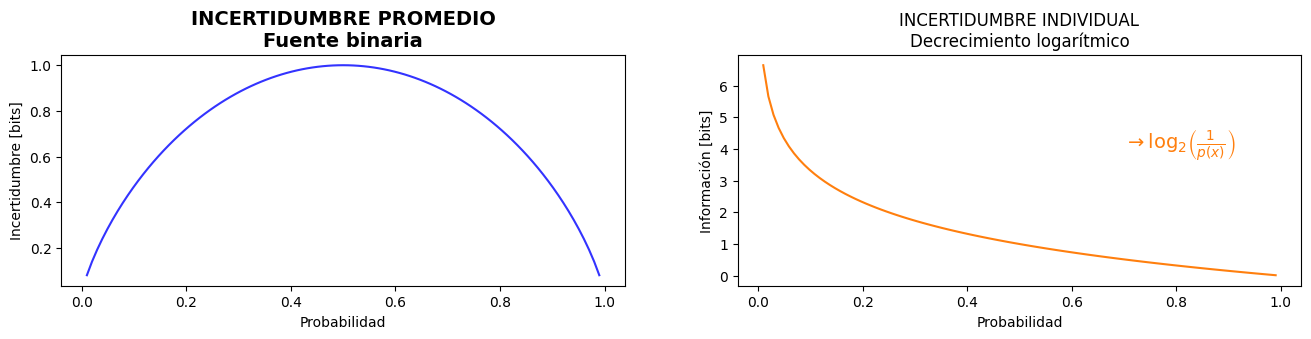

In [6]:
# Vector de valores posibles de probabilidad
x = np.linspace(0.01, 0.99, 101)

# Incertidumbre promedio de toda la fuente
y1 = -x * np.log2(x) - (1-x) * np.log2(1-x)

# Incertidumbre individual por símbolo
y2 = - np.log2(x)

# Gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 3))

# Gráfica 1
# Entropía es maxima para valores equiprobables.
plt.subplot(121)
plt.plot(x, y1, color="#3333ff")
plt.title(
    "Incertidumbre Promedio\n".upper() +
    f"Fuente binaria", fontsize=14, fontweight="bold")
plt.xlabel("Probabilidad")
plt.ylabel("Incertidumbre [bits]")

# Gráfica 2
# Mientras menos probable, más sorpresa y más información contiene.
plt.subplot(122)
plt.plot(x, y2, color="tab:orange")
plt.title(
    "Incertidumbre individual\n".upper() +
    f"Decrecimiento logarítmico")
plt.text(
    0.7, 4, r"$ \rightarrow \log_2 \left( \frac {1} {p(x)} \right) $",
    fontsize=14, color="tab:orange")
plt.xlabel("Probabilidad")
plt.ylabel("Información [bits]")

plt.show()


---
## Mas Recursos

- [Información](https://es.wikipedia.org/wiki/Informaci%C3%B3n) (Wikipedia)
- [Entropía](https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)) (Wikipedia)
- [Teoría de la información](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_informaci%C3%B3n) (Wikipedia)
- [Teorema de muestreo](https://es.wikipedia.org/wiki/Teorema_de_muestreo_de_Nyquist-Shannon) (Wikipedia)
- [Codificación de canales con ruido](https://es.wikipedia.org/wiki/Teorema_de_Shannon-Hartley) (Wikipedia)
- [Capacidad de canal](https://es.wikipedia.org/wiki/Capacidad_de_canal) (Wikipedia)